### Sections

1. [Introduction](#downloading-the-dataset)
2. [What is descriptive statistics?](#what-is-descriptive-statistics)
3. [Types of data](#types-of-data)  
    3.1. [Quantitative vs qualitative](#quantitative-vs-qualitative)  
    3.2. [Nominal](#nominal)  
    3.3. [Ordinal](#ordinal)  
    3.4. [Discrete](#discrete)  
    3.5. [Continuous](#continuous)
4. [Central tendencies](#central-tendencies)  
    4.1. [Mean](#mean)  
    4.2. [Median](#median)  
    4.3. [Mode](#mode)  
5. [Measures of variability](#measures-of-variability)  
    5.1. [Range](#range)  
    5.2. [Interquartile range](#interquartile-range)  
    5.3. [Standard deviation](#standard-deviation)  
    5.4. [Variance](#variance)
6. [Data distribution](#data-distribution)  
    6.1. [Histogram](#histogram)  
    6.2. [The data distribution of the "duration (seconds)" column](#data-distribution-2)  
    6.3. [The normal distribution](#the-normal-distribution)  
    6.4. [The uniform distribution](#the-uniform-distribution)
7. [Answering questions with descriptive statistics](#answering-questions)  
    7.1. [What is the most commonly reported UFO shape?](#7-1)  
    7.2. [What is the average duration of a UFO sighting?](#7-2)  
    7.3. [When do UFO sightings occur?](#7-3)  
    7.4. [Where do UFO sightings occur?](#7-4)
8. [Too many functions and libraries](#8)

# 1. Introduction <a id='introduction'></a>

In this notebook, we'll be using descriptive statistics to analyze the data in the "UFO sightings" dataset and answer the questions posed in the previous notebook. However, before we answer those questions, we'll also go through a general overview of descriptive statistics. 

Nevertheless, we'll be working with the cleaned version of the "UFO Sightings" dataset throughout this notebook, so let's first load it into a dataframe:

In [1]:
import pandas as pd

df = pd.read_csv("ufo_sightings_dataset_clean.csv", sep="\t", parse_dates=["datetime", "date posted"])

**Note:** we specify the tab character (`"\t"`) as the separator, since this is the separator we used when saving the dataset after preparing it last time. Also, we have to explicitly pass in a list of column names containing datetimes as the `parse_dates` argument; otherwise those columns will be of type `object` and we will have to convert them manually after we load the dataset (which is also an option).

# 2. What is descriptive statistics? <a id='what-is-descriptive-statistics'></a>

Descriptive statistics is a branch of statistics that deals with summarizing and describing data. It's used to help make sense of large amounts of data by identifying patterns, trends, and relationships. Some common descriptive statistics include measures of central tendency (like the mean, median, and mode) and measures of variability (like the range and standard deviation). These statistics can be used to create graphs, charts, and tables that make it easier to understand and communicate the data. In simple terms, descriptive statistics helps to describe the data with numbers and figures.

# 3. Types of data <a id='types-of-data'></a>

## 3.1. Quantitative vs qualitative <a id='quantitative-vs-qualitative'></a>

Quantitative data is numerical data that can be measured and quantified, such as: age, height or income. Qualitative data is non-numerical data, such as: hair color, nationality, or occupation.

In our UFO Sightings dataset, the "duration (seconds)" column is a good example of quantitative data:

In [2]:
df[["duration (seconds)"]]

,duration (seconds)
0,2700.0
1,7200.0
2,20.0
3,20.0
4,900.0
...,...
80327,600.0
80328,1200.0
80329,1200.0
80330,5.0


One advantage of quantitative data is that it can be easily analyzed using statistical methods, which can provide a more objective and rigorous way to test hypotheses and draw conclusions.

The "city" column, on the other hand, is an example of qualitative data:

In [3]:
df[["city"]]

,city
0,san marcos
1,lackland afb
2,chester (uk/england)
3,edna
4,kaneohe
...,...
80327,nashville
80328,boise
80329,napa
80330,vienna


This data is not numeric in nature, and therefore it cannot be easily analyzed using statistical methods. However, sometimes qualitative data can provide a rich, in-depth understanding of a phenomenon and can be particularly useful for exploring complex social and cultural issues. This is especially true for unstructured qualitative data, such as the data in the "comments" column of our UFO Sightings dataset:

In [4]:
df[["comments"]]

,comments
0,This event took place in early fall around 194...
1,1949 Lackland AFB&#44 TX. Lights racing acros...
2,Green/Orange circular disc over Chester&#44 En...
3,My older brother and twin sister were leaving ...
4,AS a Marine 1st Lt. flying an FJ4B fighter/att...
...,...
80327,Round from the distance/slowly changing colors...
80328,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80329,Napa UFO&#44
80330,Saw a five gold lit cicular craft moving fastl...


Structured quantitative and qualitative data can be further categorized into 4 categories: nominal, ordinal, discrete, continuous.

## 3.2. Nominal <a id='nominal'></a>

Nominal data is a type of categorical data, which refers to data that can be separated into distinct categories, but the categories do not have any inherent order or ranking. The categories are simply used to label or identify the data. Nominal data is often used to classify observations into groups or to identify certain characteristics of the observations.

For example, the type of car that a person owns would be nominal data because it describes the category of car (e.g. Sedan, SUV, truck) and there is no inherent order in the types of cars. Nominal data can be described and summarized by counting the number of observations in each category, but it is not suitable for mathematical operations such as averaging or statistical analysis.

When it comes to our UFO Sightings dataset, the following columns contain nominal data:

In [5]:
nominal_variables = ["city", "state", "country", "shape"]
df[nominal_variables]

,city,state,country,shape
0,san marcos,tx,us,cylinder
1,lackland afb,tx,us,light
2,chester (uk/england),NaN,gb,circle
3,edna,tx,us,circle
4,kaneohe,hi,us,light
...,...,...,...,...
80327,nashville,tn,us,light
80328,boise,id,us,circle
80329,napa,ca,us,other
80330,vienna,va,us,circle


## 3.3. Ordinal <a id='ordinal'></a>

Ordinal data is a type of data in which the values have a natural order or ranking. For example, a survey question that asks people to rate their satisfaction on a scale of 1 to 5 (with 1 being "very unsatisfied" and 5 being "very satisfied") is collecting ordinal data. It's important to note that ordinal data cannot tell you the exact difference or ratio between the values - it can only tell you the order of the values.

There are no examples of ordinal data in our UFO Sightings dataset, but here are some other examples:

1. Educational degrees: A list of educational degrees (such as high school diploma, associate's degree, bachelor's degree, master's degree, and doctorate) is an example of ordinal data, since each degree represents a higher level of education than the previous one.

2. Race results: The ranking of runners in a race is an example of ordinal data, since each runner's place (first, second, third, etc.) represents their relative position in the race.

3. Movie ratings: Movie ratings (such as G, PG, PG-13, R, NC-17) is an example of ordinal data, since each rating represents a different level of appropriateness for various age groups (each rating being progressively less appropriate for a younger audience).

## 3.3. Discrete <a id='discrete'></a>

Discrete data is a type of data that can only take certain specific values, rather than any value within a range.  For example, the number of students in a class is discrete data because it can only be a whole number (e.g. 8, 15, 25) - the data cannot be fractional (e.g. 8.74, 15.11, 25.39 students).

There are no examples of ordinal data in our UFO Sightings dataset, but here are some other examples:

1. The number of heads flipped in a coin toss experiment
2. The number of cars passing through an intersection during a certain time period
3. The number of times a specific word appears in a book

## 3.4. Continuous <a id='continuous'></a>

Continuous data in statistics refers to data that can take any value within a range. For example, the height of a person is continuous data because it can be any value within some range (e.g. from 40 cm to 280 cm). It makes sense for the height values to be fractional. For example, 162.4 cm still makes sense - we can even express it using different units: 162 cm and 4 mm, or 1624 mm.

We can even go in smaller increments. The length of atoms and molecules is measured on the nanoscale ($10^{-9}
$ meters), and there are even smaller objects (such as subatomic particles). It is also possible to think of continuous data as data that can be divided into smaller and smaller increments without any gaps, like weight, height, time, temperature, etc.

In our UFO Sightings, the "duration (seconds)" column is a good example of continuous data:

In [6]:
df["duration (seconds)"]

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
          ...  
80327     600.0
80328    1200.0
80329    1200.0
80330       5.0
80331    1020.0
Name: duration (seconds), Length: 80332, dtype: float64

# 4. Central tendencies <a id='central-tendencies'></a>

## 4.1. Mean <a id='mean'></a>

The mean in statistics is a way to describe the "average" value of a set of numbers. To find the mean, you add up all the values in the set and then divide by the total number of values in the set. Below is the mathematical formula for the mean:

$ \Large \frac{1}{n} \sum_{i=1}^{n} x_{i} $

In other words, if you have the numbers `1, 2, 3, 4, 5`, the mean would be `(1 + 2 + 3 + 4 + 5) / 5 = 3`. The mean can only be calculated for **discrete** or **continuous** data.


In [7]:
df["duration (seconds)"].mean()

9016.889016344669

It's important to note that the mean can be affected by outliers, or values that are much larger or smaller than the other values in the set. For example, the mean of the following numbers is 55: `50, 50, 50, 60, 60, 60`. Similarly, the mean of the following numbers is also 55: `5, 5, 5, 5, 5, 305`. In the first case, all numbers are close to the mean and it can be said that the mean gives a good estimate of the typical value in the set. However, in the second case, every value in the set is much further away from the mean.

One real-world example of this is when a small percentage of people earn a very high income in some region, which significantly raises the mean income for that region. In effect, the mean does not accurately reflect a typical income very well. Fortunately, there is another measure of the average/typical value - the median - which is not sensitive to outliers.

## 4.2. Median <a id='median'></a>

The median in statistics is a way to describe the "middle" value of a set of numbers. To find the median, you first arrange all the numbers in the set in numerical order (from smallest to largest), and then pick the number that is in the middle.

For example, if you have the numbers `7, 2, 7, 1, 4`, you would arrange them in numerical order like `1, 2, 4, 7, 7`, the median would be `4`. It means that half of the values in the set are greater than `4` and half of the values are less than `4`.

If the set has an even number of values, you would take the average of the two middle numbers instead. So for the numbers `1, 2, 4, 7, 7, 8`, the median is `(4 + 7) / 2 = 5.5`. In simple terms, the median is a way of describing the middle value of a set of numbers, and it's not affected by outliers or extreme values like the mean can be. The median can be calculated for **ordinal**, **discrete** or **continuous** data, but it is typically calculated only for **discrete** or **continuous** data.

In [8]:
df["duration (seconds)"].median()

180.0

The large difference in the median (180) and the mean (9016) suggests that there are some outliers. More specifically, there are some very large values in the "duration (seconds)" column.

## 4.3. Mode <a id='mode'></a>

The mode is the value that appears most often in a set of values. For example, if we have a set of numbers like `1, 2, 3, 4, 4, 5`, the mode is `4` because it appears twice, while all the other numbers appear only once. Similarly, if we have a set of values such as `Germany, France, Spain, France, France, Spain`, the mode is `France` because it appears three times - more than any other value. The mode can be calculated for any type of structured data (**nominal**, **ordinal**, **discrete**, or **continuous**), but it is typically calculated for **nominal** data.

In [9]:
df["shape"].mode()

0    light
Name: shape, dtype: object

# 5. Measures of variability <a id='measures-of-variability'></a>

## 5.1. Range <a id='range'></a>

In statistics, the "range" is a measure of how spread out a set of numbers is. It is calculated by taking the difference between the largest and smallest values in the set. So, if a set of numbers is `1, 2, 3, 4, 5`, the range would be `5 - 1 = 4`, because the difference between the largest number (`5`) and the smallest number (`1`) is `4`. 

In [10]:
df["duration (seconds)"].min()

0.001

In [11]:
df["duration (seconds)"].max()

97836000.0

In [12]:
df["duration (seconds)"].max() - df["duration (seconds)"].min()

97835999.999

## 5.2. Interquartile range <a id='interquartile-range'></a>

The interquartile range is a measure of how spread out the middle of a set of numbers is. It is calculated by taking the difference between the the 75th and 25th percentiles (also known as the first and third quartiles, Q1 and Q3). It gives an idea of the range of the middle 50% of the data. It is a robust measure of spread, as it is not affected by outliers or extreme values in the dataset.

The first quartile is the middle number of the bottom half when numbers are listed in ascending order - it separates the lowest 25% of the data from the rest. The third quartile is the middle number of the upper half of the data so it separates the lowest 75% of the data from the rest.

For example, let's say you have the following set of numbers:

`2, 5, 5, 7, 8, 10, 12, 12, 18, 20`

To calculate the IQR, you would first find the median (also known as the 50th percentile or the second quartile, Q2) of the dataset, which is `9` (the average of `10` and `12`).

Then, to find Q1 and Q3, you would divide the dataset into two parts: the lower half and the upper half.

The lower half is:
`2, 5, 5, 7, 8`
and Q1 is the median of this subset, which is `5`.

The upper half is:
`10, 12, 12, 18, 20`
and Q3 is the median of this subset, which is `12`.

The interquartile range (IQR) is the difference between Q3 and Q1. So in this example, `IQR = 12 - 5 = 7`.



In [13]:
df["duration (seconds)"].quantile([0.25,0.5,0.75])

0.25     30.0
0.50    180.0
0.75    600.0
Name: duration (seconds), dtype: float64

In [14]:
q1 = df["duration (seconds)"].quantile(0.25)
q3 = df["duration (seconds)"].quantile(0.75)

In [15]:
iqr = q3 - q1
iqr

570.0

## 5.3. Standard deviation <a id='standard-deviation'></a>

The standard deviation is a measure of how spread out a set of numbers is. It tells you, on average, how far away each number in a set is from the average (mean) of the set. A smaller standard deviation means that most of the numbers in the set are close to the average, while a larger standard deviation means that the numbers are more spread out.

To calculate the standard deviation, you first find the average of the set of numbers. Then, for each number in the set, you subtract the average and square the result. You then add up all of these squared differences, divide by the number of numbers in the set, and take the square root of that number. This is encapsulated by the following formula:

$ \Large \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^n (x_i - \mu)^2} $

where:

1. $\large \sigma$ is the conventional symbol for the standard deviation of a population (in the next notebook we will explore what a population is).
2. $\large \mu $ is the mean of the population
3. $ N$ is the population size

Let's calculate the standard deviation for the following two lists of numbers:

In [16]:
a = [50, 50, 50, 60, 60, 60]
b = [20, 20, 20, 90, 90, 90]

In [17]:
def calculate_std(numbers):
    mean = sum(numbers) / len(numbers) 
    
    squared_differences = []
    for number in numbers:
        squared_differences.append((mean - number)**2)
        
    return (sum(squared_differences) / len(squared_differences))**0.5

In [18]:
print(calculate_std(a))
print(calculate_std(b))

5.0
35.0


**Note:** we could have also converted the lists to numpy arrays and use the `.std()` method to calculate the standard deviation:

In [19]:
import numpy as np

std_a = np.array(a).std()
std_b = np.array(b).std()

print(std_a)
print(std_b)

5.0
35.0


As we can see, the standard deviation of list `a` is smaller than the standard deviation of list `b`. This makes sense because the standard deviation tells us how far away, on average, are the values from the mean. In the case of list `a`, the standard deviation is `5`, which makes sense, because all of the numbers are `5` away from the mean (`55`). In the case of list `b`, the standard deviation is `35`, which is how far away each number is from the mean (`55`). In the real world, data consists of many more numbers, whose distance from the mean varies - the standard deviation allows us to quickly gain an idea of how spread out the data is.

In [20]:
df["duration (seconds)"].std()

620216.790291459

As we can see, the standard deviation is much bigger than the interquartile range, which suggest that we have outliers (values that are much bigger or smaller than the majority of values).

## 5.3. Variance <a id='variance'></a>

The variance can be calculated using the `Series.var()` method and it is equivalent to the standard deviation squared:

In [21]:
var = df["duration (seconds)"].var()
std = df["duration (seconds)"].std()

var.round(2) == (std**2).round(2)

True

In other words, the formula for variance is the same as the formula for the standard deviation, but without the square root:

$ \Large \sigma^{2} = \frac{1}{N} \sum_{i=1}^n (x_i - \mu)^2 $

The standard deviation is used more commonly because it is in the same unit as the original data, while the variance is in squared units. This makes the standard deviation more interpretable and easier to understand.

# 6. Data distribution <a id='data-distribution'></a>

From here on out we'll be creating some data visualizations, and therefore we need to install the Matplotlib library, which is integrated with Pandas and will allow us to do so easily:

In [22]:
!pip install matplotlib

## 6.1. Histogram <a id='histogram'></a>

A data distribution is a way to describe and summarize a set of data. It shows how often different values appear in the data. For example, a histogram is a common way to show a data distribution. It shows how many times each value appears in the data by using bars. The height of each bar shows how often that value appears in the data. This can help you understand the overall pattern of the data and look for any unusual values.

Below is an example of a histogram created from some synthetic data. We first create a list, then we create a `Series` from that list, and then we call the `Series.hist()` method, which returns a histogram that is then displayed (if we did not have Matplotlib installed, calling the `Series.hist()` method would result in an error):

<AxesSubplot: >

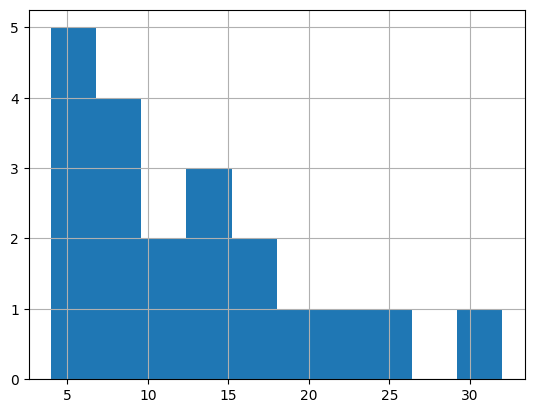

In [23]:
data = [15, 23, 4, 6 ,4, 18, 12, 15, 7, 4, 32, 16, 14, 17, 6, 7, 8, 8, 12, 25]
pd.Series(data).hist()

The y-axis corresponds to the number of times (frequency) a certain value appears, while the x-axis corresponds to the values. Let's label the axes and add a title to our histogram first:

Text(0.5, 1.0, 'A demo histogram of synthetic data')

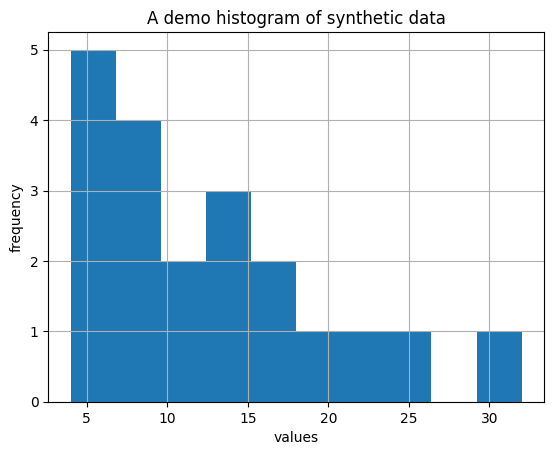

In [24]:
plot = pd.Series(data).hist()

plot.set_xlabel("values")
plot.set_ylabel("frequency")
plot.set_title("A demo histogram of synthetic data")

Since a histogram is made up of bars, each bar represents a range of values. The range of values covered by each bar can be set manually with the `bins` argument. For example, we can pass in a list:

<AxesSubplot: >

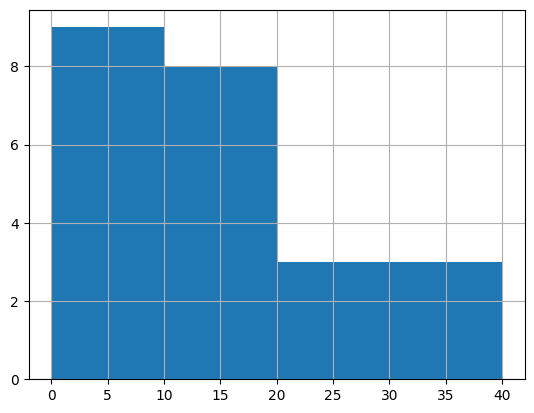

In [25]:
pd.Series(data).hist(bins=[0, 10, 20, 40])

Now there are three bars, with the following ranges: 0-10, 10-20, 20-40. The ranges exclude the right value (with the exception of the last range). We can also pass in an `int` as the `bins` argument, which will create a specific number of bars, each of which will cover an equivalent range of values and which together cover the entire range of values:

<AxesSubplot: >

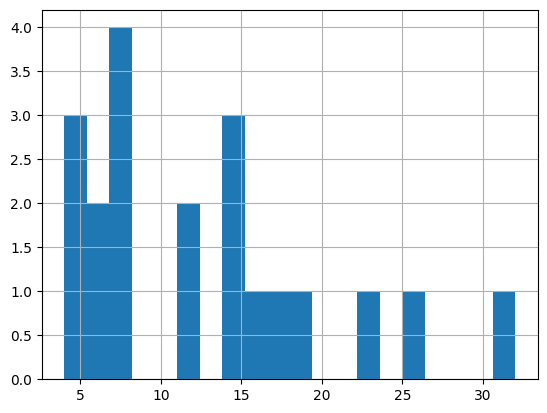

In [26]:
pd.Series(data).hist(bins=20)

The default value for the `bins` argument is `10`. Therefore, if we do not pass in any arguments, by default the `Series.hist()` method creates 10 bins (10 ranges of values), which are equally spaced.

## 6.2. the data distribution of the "duration (seconds)" column <a id='data-distribution-2'></a>

Let's look at the data distribution of the "duration (seconds)" column:

<AxesSubplot: >

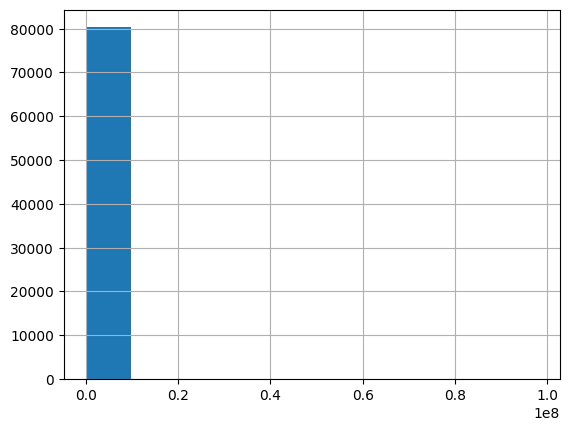

In [27]:
df["duration (seconds)"].hist()

This histogram isn't very useful. If we look at the x-axis, we can see that `1e8` appears in the bottom right, which means the scale of the x-axis goes up to `100 000 000` seconds. This is a lot since most values are much smaller, as indicated by the single visible bar on the histogram.

Let's create a histogram of the middle 95% of data, to exclude outliers. In other words, we are excluding 2.5% of the smallest values and 2.5% of the largest values:

<AxesSubplot: >

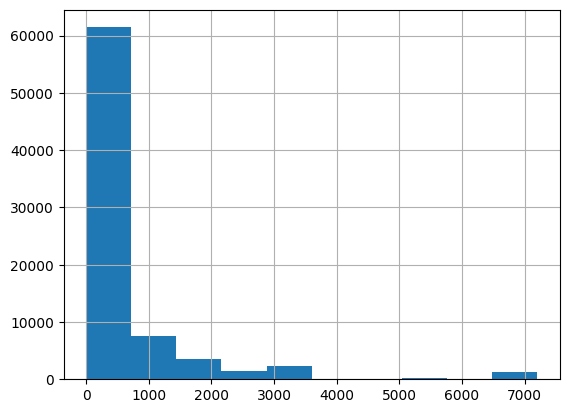

In [28]:
mask_1 = df["duration (seconds)"] >= df["duration (seconds)"].quantile(0.025) 
mask_2 = df["duration (seconds)"] <= df["duration (seconds)"].quantile(0.975)
mask = mask_1 & mask_2

df[mask]["duration (seconds)"].hist()

It seems that the majority of the reported UFO Sightings last less than 1000 seconds. We know that the median value is actually 180, so let's increase the resolution of this histogram, by increasing the number of bins:

<AxesSubplot: >

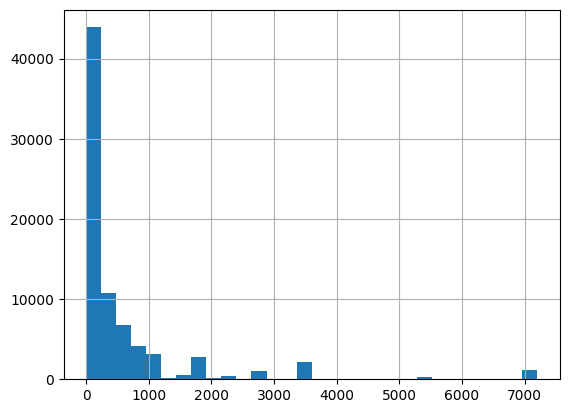

In [29]:
df[mask]["duration (seconds)"].hist(bins=30)

Now we can see a bit clearer how the data is distributed. Let's add labels and a title:

<AxesSubplot: title={'center': 'Duration of UFO sightings histogram'}, xlabel='Duration (seconds)', ylabel='Frequency'>

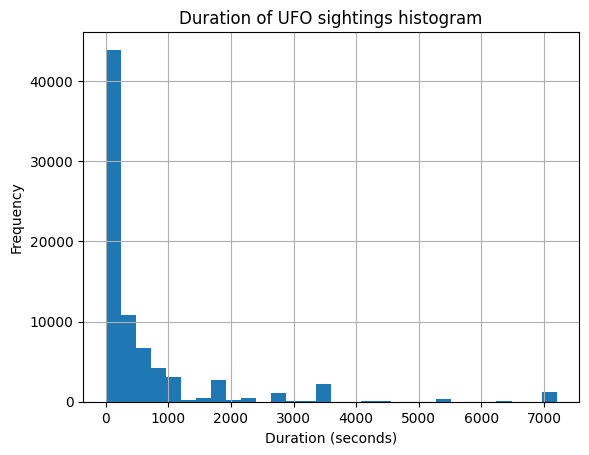

In [30]:
plot = df[mask]["duration (seconds)"].hist(bins=30)

plot.set_xlabel("Duration (seconds)")
plot.set_ylabel("Frequency")
plot.set_title("Duration of UFO sightings histogram")
plot

## 6.3. The normal distribution <a id='the-normal-distribution'></a>

Before you proceed with this subsection, it is recommended that you watch [this video](https://www.youtube.com/watch?v=rzFX5NWojp0&ab_channel=StatQuestwithJoshStarmer), which does an excellent job of explaining what the normal distribution is.

The normal distribution, also known as the Gaussian distribution or the bell curve, is a kind of symmetric distribution of data, with a single peak, that looks approximately like this:

<AxesSubplot: >

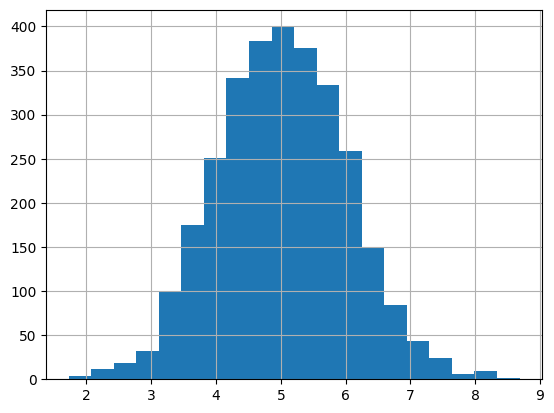

In [31]:
data = np.random.normal(5, 1, 3000)
pd.Series(data).hist(bins=20)

The normal distribution is important as it often appears in the real world. To some extent this is intuitive. Imagine what the distribution of height in a population might look like. You may imagine that most people will have a height near the mean, and as you get further away from the mean height, you are less likely to find people who have that height. We have just described the normal distribution. As you can see on the histogram above, most of the values are concentrated around the mean (which is `5` in this case), and as we get further away from the mean, the height of the bars decreases (meaning the frequency of those values is smaller.


The normal distribution is characterized by two parameters: the mean (μ) and the standard deviation (σ). The mean represents the center of the distribution, and the standard deviation represents the spread of the data, which translates to how wide the distribution is on a histogram. In the code cell above, the mean is `5` and the standard deviation is `1`.

Take a look at what happens if we increase the standard deviation:

<AxesSubplot: >

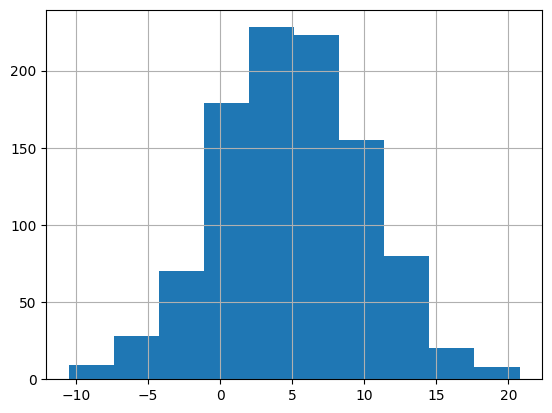

In [32]:
data = np.random.normal(5, 5, 1000)
pd.Series(data).hist()

The shape of the distribution is wider. If we look at the the values in the x-axis, we can see that the data is distributed roughly between the values `-10` and `20` (whereas previously it was roughly between `2` and `8`).

Now take a look at what happens if we change the mean:

<AxesSubplot: >

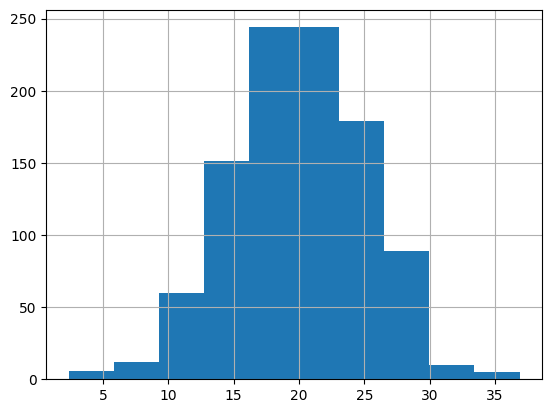

In [33]:
data = np.random.normal(20, 5, 1000)
pd.Series(data).hist()

The width of the normal distribution is the same, but it has been shifted to the right, since the mean is now `20`

The normal distribution is an important concept in statistics, as the data distribution of many real-world phenomena is roughly approximated by the normal distribution. The normal distribution also has interesting properties, such as:

1. The mean, median, and mode of a normal distribution are all equal.
2. About 68% of data falls within one standard deviation of the mean, about 95% falls within two standard deviations, and about 99.7% falls within three standard deviations.

## 6.4. The uniform distribution <a id='the-uniform-distribution'></a>

The uniform distribution is another distribution worth knowing about. Here's what a histogram of values sampled from a uniform distribution looks like:

<AxesSubplot: >

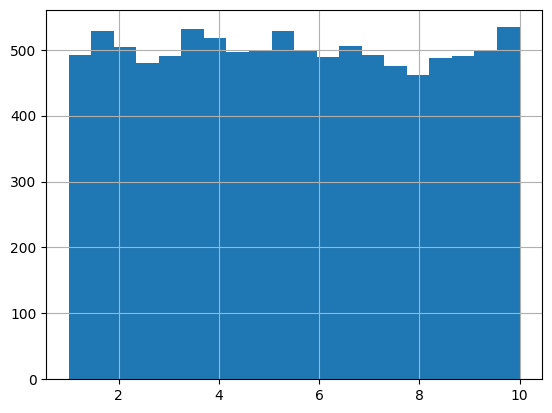

In [34]:
data = np.random.uniform(1, 10, 10000)
pd.Series(data).hist(bins=20)

A perfectly uniform distribution means that all values have the same frequency. 

# 7. Answering questions with descriptive statistics <a id='answering-questions'></a>

Now we will use Pandas and the UFO sightings dataset to answer the questions posed in the previous notebook.

##  7.1. What is the most commonly reported UFO shape? <a id='7-1'></a>

In [35]:
df["shape"].mode()

0    light
Name: shape, dtype: object

Let's also show a bar graph with the percentage of different shapes reported. We can use the `Series.value_counts()` method to get the frequency of values:

In [36]:
df["shape"].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

If we pass in `True` as the `normalize` argument, then we will get the value counts as a fraction of total number of values:

In [37]:
df["shape"].value_counts(normalize=True)

light        0.227491
triangle     0.108012
circle       0.104483
fireball     0.085256
other        0.077579
sphere       0.073981
disk         0.071591
oval         0.051266
formation    0.033743
cigar        0.028249
changing     0.026945
flash        0.018238
rectangle    0.017812
cylinder     0.017620
diamond      0.016178
chevron      0.013074
egg          0.010424
teardrop     0.010300
cone         0.004340
cross        0.003200
delta        0.000096
round        0.000027
crescent     0.000027
pyramid      0.000014
flare        0.000014
hexagon      0.000014
dome         0.000014
changed      0.000014
Name: shape, dtype: float64

We can multiply this by a 100 to get the percentage:

In [38]:
df["shape"].value_counts(normalize=True) * 100

light        22.749121
triangle     10.801198
circle       10.448253
fireball      8.525599
other         7.757910
sphere        7.398099
disk          7.159141
oval          5.126621
formation     3.374258
cigar         2.824929
changing      2.694463
flash         1.823775
rectangle     1.781202
cylinder      1.761975
diamond       1.617776
chevron       1.307405
egg           1.042353
teardrop      1.029993
cone          0.433971
cross         0.319985
delta         0.009613
round         0.002747
crescent      0.002747
pyramid       0.001373
flare         0.001373
hexagon       0.001373
dome          0.001373
changed       0.001373
Name: shape, dtype: float64

Let's use all of this together with the `Series.plot.bar()` method to create a bar graph:

<AxesSubplot: title={'center': 'Shape of UFO'}, ylabel='Percentage'>

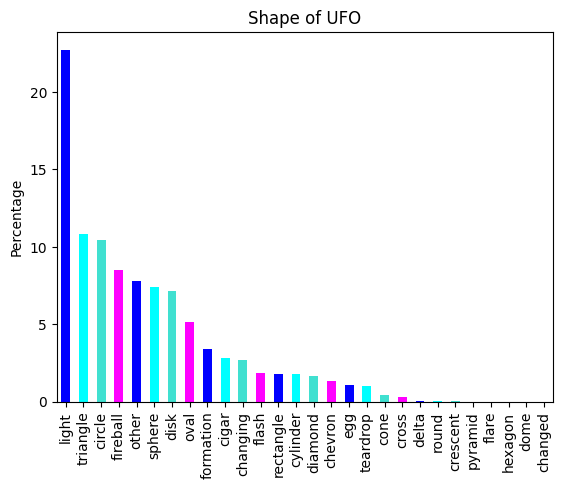

In [39]:
data = df["shape"].value_counts(normalize=True) * 100

data.plot.bar(
    title="Shape of UFO",
    ylabel="Percentage",
    color=["blue", "cyan", "turquoise", "magenta"]
)

## 7.2. What is the average duration of a UFO sighting? <a id='7-2'></a>

As discussed previously, due to there being outliers, it is better to use the median to represent the average duration:

In [40]:
df["duration (seconds)"].median()

180.0

We may also want to display a histogram of the values, to get a better sense of the data distribution (the code below is copy-pasted from previous cells):

Text(0.5, 1.0, 'Duration of UFO sightings histogram')

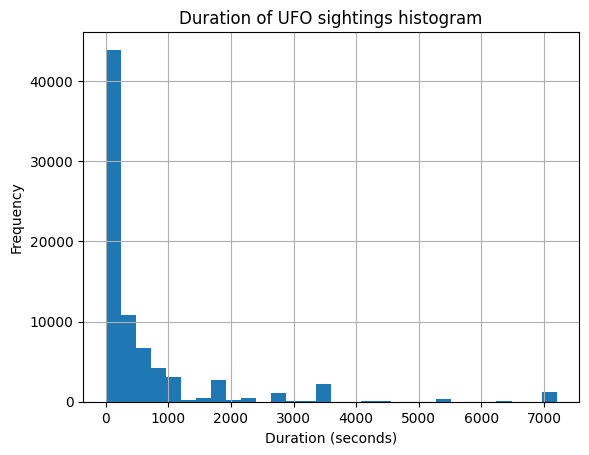

In [41]:
# exclude outliers
mask_1 = df["duration (seconds)"] >= df["duration (seconds)"].quantile(0.025) 
mask_2 = df["duration (seconds)"] <= df["duration (seconds)"].quantile(0.975)
mask = mask_1 & mask_2

# create plot
plot = df[mask]["duration (seconds)"].hist(bins=30)

# add labels and title
plot.set_xlabel("Duration (seconds)")
plot.set_ylabel("Frequency")
plot.set_title("Duration of UFO sightings histogram")

We could also, for example, compare the median duration of UFO sightings in different states in the US:

In [42]:
mask = df["country"] == "us"
data = df[mask].groupby("state")["duration (seconds)"].median().sort_values(ascending=False)
data

state
bc    7200.0
ab    1950.0
az     300.0
ak     300.0
me     300.0
ky     240.0
wi     240.0
nv     240.0
nm     240.0
nd     240.0
mt     240.0
ms     240.0
de     240.0
ga     180.0
nh     180.0
ca     180.0
ar     180.0
ny     180.0
oh     180.0
ok     180.0
or     180.0
pa     180.0
ri     180.0
sc     180.0
tn     180.0
tx     180.0
ut     180.0
va     180.0
vt     180.0
al     180.0
wv     180.0
hi     180.0
nj     180.0
ne     180.0
ks     180.0
la     180.0
ma     180.0
in     180.0
il     180.0
md     180.0
mi     180.0
id     180.0
mn     180.0
mo     180.0
ia     180.0
ct     180.0
nc     180.0
fl     180.0
sd     165.0
wa     120.0
wy     120.0
co     120.0
pr     120.0
on      60.0
mb      30.0
dc      10.0
pe       5.0
Name: duration (seconds), dtype: float64

We could then display the data in a bar graph, like so:

<AxesSubplot: title={'center': 'Median duration of UFO sightings (by state in the US)'}, xlabel='state', ylabel='Median duration of UFO sightings'>

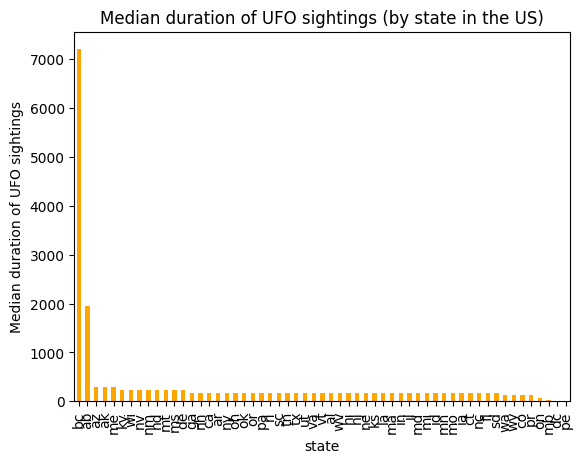

In [43]:
plot = data.plot.bar(
    title="Median duration of UFO sightings (by state in the US)",
    ylabel="Median duration of UFO sightings",
    color="orange"
)
plot

It's a bit small - we can increase the width of the graph like so:

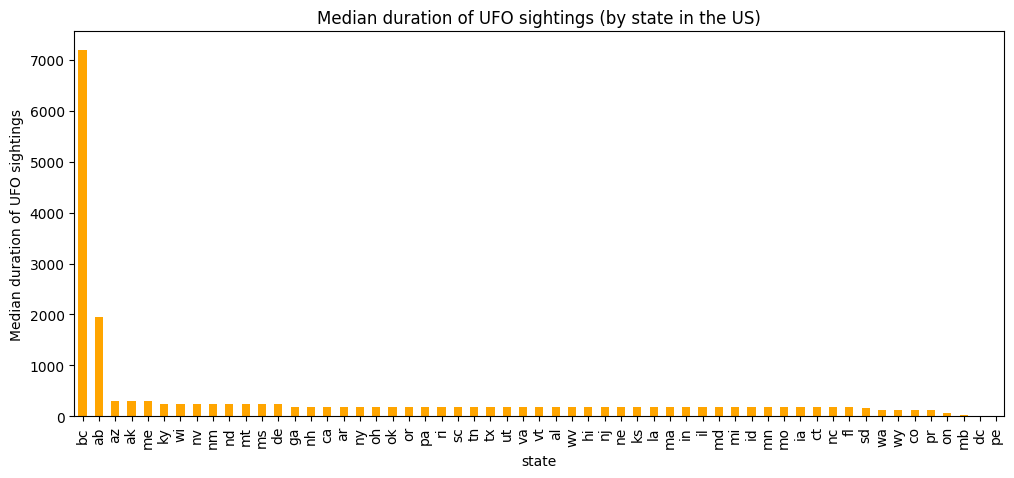

In [44]:
plot.figure.set_size_inches(12, 5)
plot.figure # writing just plot for some reason no longer works here after resizing

## 7.3. When do UFO sightings occur? <a id='7-3'></a>

This question is not as specific as the previous two questions. For example, we could break it down by:

1. hour
2. day of the week
3. month
4. season
5. year

Let's do all of the above!

### When do UFO sightings occur? (hour)

<AxesSubplot: title={'center': 'Percentage distribution of UFO sightings (by hour)'}, ylabel='Percentage'>

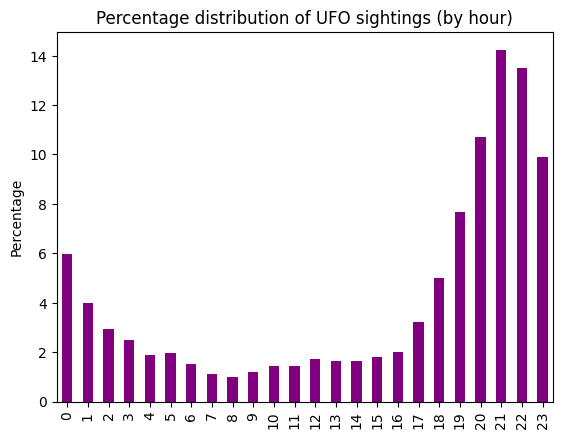

In [45]:
data = df['datetime'].dt.hour.value_counts(normalize=True).sort_index() * 100

data.plot.bar(
    title="Percentage distribution of UFO sightings (by hour)",
    ylabel="Percentage",
    color="purple"
)

### When do UFO sightings occur? (day of week)

<AxesSubplot: title={'center': 'Percentage distribution of UFO sightings by day of week'}, ylabel='Percentage'>

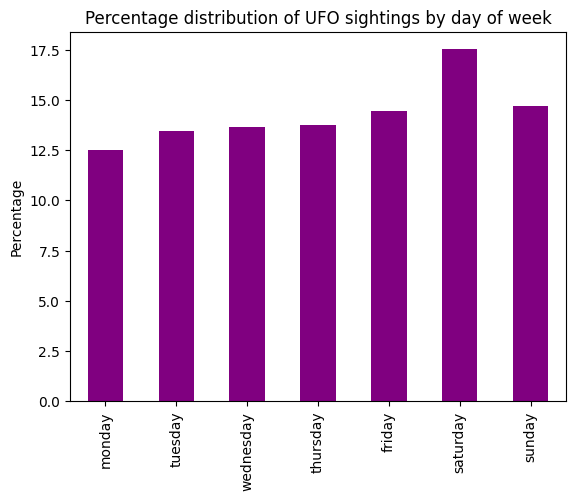

In [46]:
data = df['datetime'].dt.dayofweek.value_counts(normalize=True).sort_index() * 100
data.index = pd.Index(["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

data.plot.bar(
    title="Percentage distribution of UFO sightings by day of week",
    color="purple",
    ylabel="Percentage",
)

### When do UFO sightings occur? (month)

<AxesSubplot: title={'center': 'Percentage distribution of UFO sightings by month'}, ylabel='Percentage'>

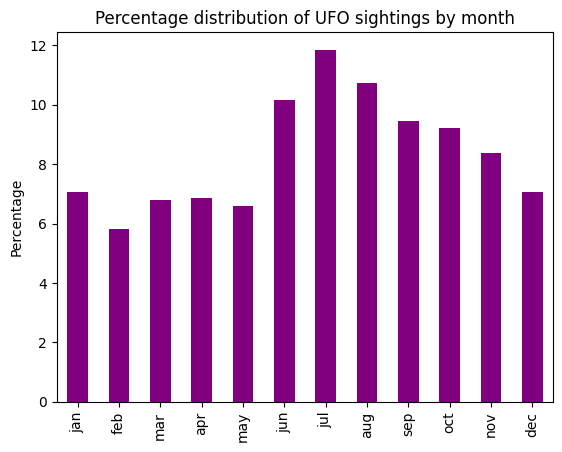

In [47]:
data = df['datetime'].dt.month.value_counts(normalize=True).sort_index() * 100
data.index = pd.Index([
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec"
])

data.plot.bar(
    title="Percentage distribution of UFO sightings by month",
    color="purple",
    ylabel="Percentage",
)

### When do UFO sightings occur? (season)

Let's first create a "season" Series based on the month of the year. We can access the month value in the "datetime" column like so:

In [48]:
df["datetime"].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
80327     9
80328     9
80329     9
80330     9
80331     9
Name: datetime, Length: 80332, dtype: int64

If we look at the unique values, we can see that the month values go from 1 to 12:

In [49]:
df["datetime"].dt.month.unique()

array([10,  1, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

Let's create a function that returns the name of the season based on the month:

In [50]:
def convert_month_to_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "autumn"
    else:
        raise ValueError("Invalid month value: " + str(month))

Now let's see what happens if we apply it to the month values in the "datetime" column:

In [51]:
df["datetime"].dt.month.apply(convert_month_to_season)

0        autumn
1        autumn
2        autumn
3        autumn
4        autumn
          ...  
80327    autumn
80328    autumn
80329    autumn
80330    autumn
80331    autumn
Name: datetime, Length: 80332, dtype: object

Let's check the unique values to double-check that everything is correct:

In [52]:
df["datetime"].dt.month.apply(convert_month_to_season).unique()

array(['autumn', 'winter', 'spring', 'summer'], dtype=object)

In [53]:
data = df["datetime"].dt.month.apply(convert_month_to_season).value_counts(normalize=True)
data

summer    0.327491
autumn    0.270565
spring    0.202534
winter    0.199410
Name: datetime, dtype: float64

We now want to sort the index so that it is in the following order: summer, autumn, winter, spring. In order to do so, first we have to create an index sorting function that will replace index values with their position. Then we can call the `Series.sort_index()` method and pass in our function as the `key` argument.

In [54]:
def sort_index_key(current_index):
    mapping = {"summer": 0, "autumn": 1, "winter": 2, "spring": 3}
    # convert index to series, so that we can use the .replace() method
    new_index = pd.Series(current_index)
    for key, value in mapping.items():
        # replace original index values with numbers representing position
        new_index = new_index.replace(key, value)
    return new_index

data = data.sort_index(key=sort_index_key) * 100
data

summer    32.749091
autumn    27.056466
winter    19.940995
spring    20.253448
Name: datetime, dtype: float64

Now let's create a bar graph:

<AxesSubplot: title={'center': 'Percentage distribution of UFO sightings by season'}, ylabel='Percentage'>

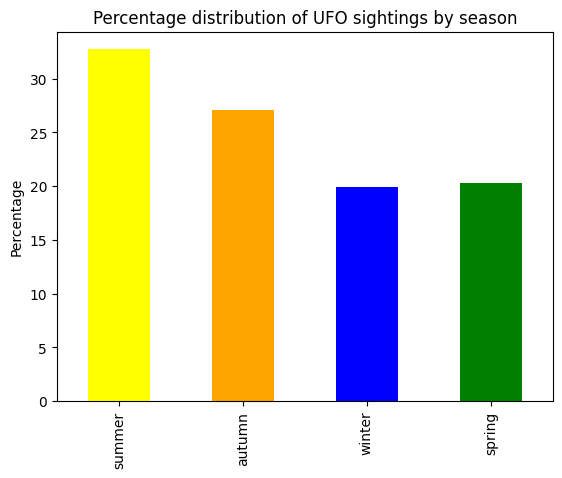

In [55]:
data.plot.bar(
    title="Percentage distribution of UFO sightings by season",
    color=["yellow", "orange", "blue", "green"],
    ylabel="Percentage",
)

We can also create a piechart:

<AxesSubplot: title={'center': 'Percentage distribution of UFO sightings by season'}>

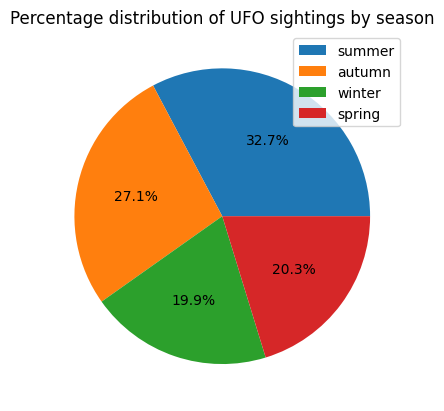

In [56]:
data.plot.pie(
    title="Percentage distribution of UFO sightings by season",
    ylabel="",
    legend=True,
    autopct='%1.1f%%',
    labeldistance=None
)

### When do UFO sightings occur? (year)

<AxesSubplot: title={'center': 'UFO sightings by year'}, ylabel='Frequency'>

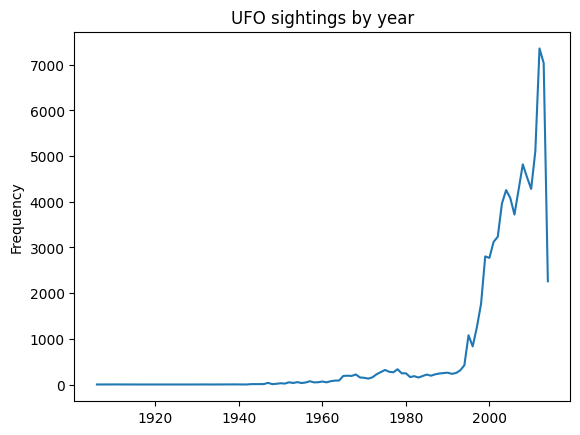

In [57]:
data = df["datetime"].dt.year.value_counts().sort_index()

data.plot.line(
    title="UFO sightings by year",
    ylabel="Frequency"
)

It seems that the number of UFO sightings has been increasing over the years, but there's a suspicious drop right at the end. Perhaps this is caused by the fact that the data collection for the last year was incomplete. For example, the data was only collected until May. In this case, we should probably remove the data from the last year, when creating the line graph, as it gives a false impression of a decrease in UFO sighting reports. However, first we have to verify that our assumption is correct.

Let's first check what is the last year:

In [58]:
df["datetime"].dt.year.max()

2014

Let's create a mask based on the last year:

In [59]:
mask = df["datetime"].dt.year != df["datetime"].dt.year.max()

Let's use this mask to find out the what is the largest month value for that year (2014):

In [60]:
df["datetime"][mask].dt.month.max()

12

It seems our assumption was wrong - there are UFO sightings reported in December of 2014, which means the data collection isn't incomplete for that year. Therefore our graph is accurate, and there is a decline in UFO sighting reports for some other reason. Nevertheless, it is good to be vigilant when analyzing data, especially when some data seems suspicious. It is always better to investigate and make sure that the data analysis is as accurate as it can be.

## 7.4. Where do UFO sightings occur? <a id='7-4'></a>

Similarly, this question is not very specific, and therefore it could be answered in terms of the country, state or city. Let's first answer it in terms of the country:

<AxesSubplot: title={'center': 'Frequency of UFO sightings (by country)'}, ylabel='Frequency'>

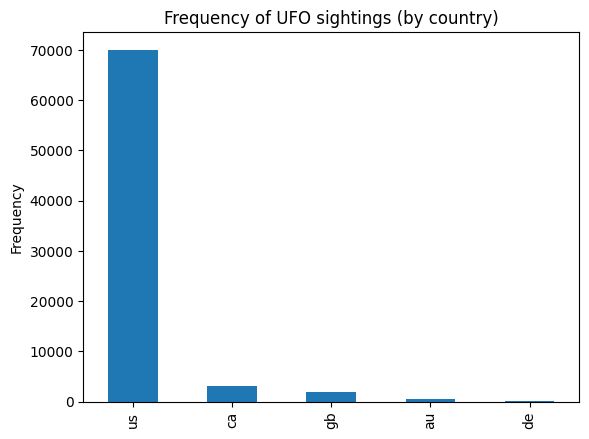

In [61]:
df["country"].value_counts().plot.bar(title="Frequency of UFO sightings (by country)", ylabel="Frequency")

Now we can answer it in terms of the state (in the US):

<AxesSubplot: title={'center': 'Frequency of UFO sightings (by state in the US)'}, ylabel='Frequency'>

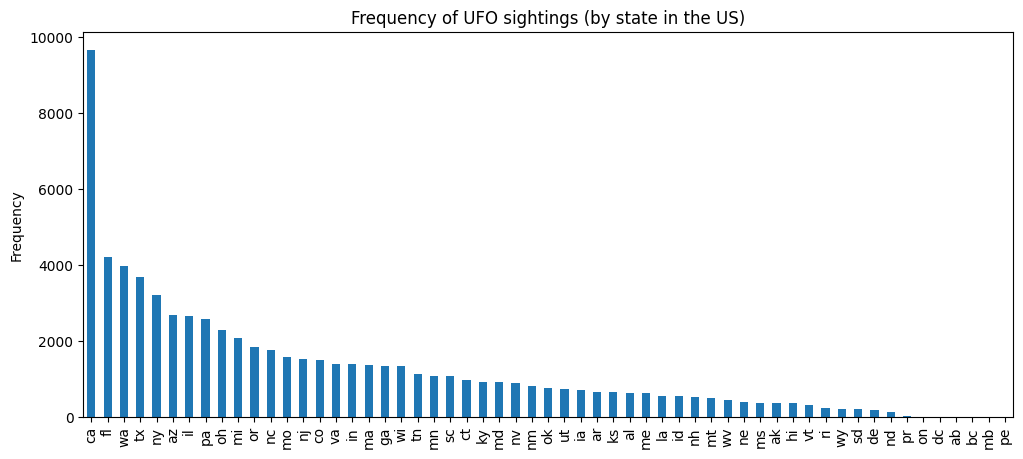

In [62]:
mask = df["country"] == "us"
plot = df[mask]["state"].value_counts().plot.bar(title="Frequency of UFO sightings (by state in the US)")
plot.figure.set_size_inches(12, 5)
plot.set_ylabel("Frequency")
plot

If we want to show the frequency of UFO sightings by city, the bar graph is not a good choice because there are just too many cities. We could, however, show the UFO sighting locations on a map since we have the longitude and latitude values. Let's first install the Folium library, which will allow us to do so easily:

In [63]:
!pip install folium

Let's import the library:

In [64]:
import folium

Let's create an interactive map pointing roughly to the united states:

In [65]:
m = folium.Map(location=[37.70, -97.94], zoom_start=4, tiles='CartoDB positron')
m

Now let's add markers to the map that contain some information about specific UFO sightings. Here's a brief outline of what the code in the cell below does (we'll go over some of those things in more detail in just a bit)

1. We first create a mask to only select UFO sightings within the US
2. We then use a for loop with the `DataFrame.iterrows()` method, which returns an iterator that iterates over each row in the dataframe. The iterator returns a tuple containing an index and a Series, which we unpack to the variables `i` and `row`.
3. To limit the number of markers that appear on the map (for visual clarity), we add a conditional statement, which will only add a marker for every 1000th row.
4. We create a variable containing text that will popup if we click on the marker (we use f-strings to format the text - more will be said about this in a bit)
5. We create a folium marker based on the latitude and longitude values in the row
6. We add the marker to the map we created earlier and stored in the variable `m`
7. We display the map stored in the variable `m`

**Note:** the code cell below might take up to a minute to run. Also, you may notice that the "longitude " column name has a space at the end. This is  was not caught during the data preparation process, but fortunately it is only a small nuisance. 

In [66]:
mask = df["country"] == "us"
for i, row in df[mask].iterrows():
    if i % 1000 == 0:
        text = f"City: {row['city']} \n\n Duration: {row['duration (seconds)']} \n\n Shape: {row['shape']}"
        marker = folium.Marker(location=[row['latitude'], row['longitude ']], popup=text)
        marker.add_to(m)

m

Let's go over the some of the code in the cell above. The `DataFrame.iterrows()` method allows us to iterate over the rows. Take a look at the example below (which iterates over three rows):

In [67]:
for i, row in df[:3].iterrows():
    print("i:", i)
    print(row)
    print("-" * 20)

i: 0
datetime                                            1949-10-10 20:30:00
city                                                         san marcos
state                                                                tx
country                                                              us
shape                                                          cylinder
duration (seconds)                                               2700.0
comments              This event took place in early fall around 194...
date posted                                         2004-04-27 00:00:00
latitude                                                      29.883056
longitude                                                    -97.941111
Name: 0, dtype: object
--------------------
i: 1
datetime                                            1949-10-10 21:00:00
city                                                       lackland afb
state                                                                tx
country   

We have also used f-strings, which are a different way of formatting strings. An f-string looks like a normal string with an f in front: `f"this is an f-string"`. We can use curly braces `{}` inside of f-strings to insert some code, which returns a value. This code will be ran, converted to a `str` and concatenated with the rest of the f-string. Take a look at the code below, which contains three ways of combining and displaying strings (the first of which uses an f-string):

In [68]:
name = "Anna"
age = 34

print(f"{name} is {age} years old.")
print(name, "is", age, "years old.")
print(name + " is " + str(age) + " years old.")

Anna is 34 years old.
Anna is 34 years old.
Anna is 34 years old.


As we can see, the texts printed by the `print` function are identical. You may have also noticed that the following characters `\n` appeared in a string earlier. These two characters are used together to denote a new line in the text. Take a look at the output of the code cells below:

In [69]:
print("1\n2")

1
2


In [70]:
print("1 \n 2")

1 
 2


In [71]:
print("1\n\n\n2")

1


2


# 8. Too many functions and libraries...  

We used a lot of different functions and libraries in the past 4 notebooks (including this one) and it may all seem a bit overwhelming. It is not necessary or important to remember all of those functions. This will not make you a better programmer or data analyst. It is, however, important to build an intuition about what kind of transformations can be done on data. Once you know what it is you want to accomplish, it is also helpful to be able to describe it using the right vocabulary. Once you have both of those things, it becomes trivial to use a search engine (such as google) and describe what you want to do. The search engine will then point you to websites, which will present you with functions and libraries that will help you accomplish your task, along with descriptions and examples of how they work. 